In [1]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import sklearn
import sklearn.metrics

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [26]:
#building all kinds of evaluating parameters
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score, roc_auc_score, average_precision_score, precision_recall_curve
from sklearn.metrics import roc_curve,auc, roc_auc_score, average_precision_score
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix 

In [39]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from xgboost import XGBClassifier
from math import sqrt
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [4]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [5]:
import pandas as pd

url2 = 'Dataset/PRFI_4M_DEF_HEAD.txt'
df = pd.read_table(url2, sep=';')


In [5]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- ID_OPER ---
6333399040    1
6365287784    1
6245702090    1
6219615315    1
6237108555    1
             ..
6400932371    1
6488952292    1
6484768227    1
6354746850    1
6328973489    1
Name: ID_OPER, Length: 5442906, dtype: int64
---- DT_OP_GMT ---
2016-03-01    77129
2016-03-26    69256
2016-03-25    68933
2016-04-01    65935
2016-03-02    65231
              ...  
2016-03-27    21814
2016-06-26    20717
2016-06-19    19880
2016-06-12    19829
2016-06-05    18804
Name: DT_OP_GMT, Length: 122, dtype: int64
---- ORA_OP_GMT ---
09:36:51    182
09:39:39    179
10:08:17    179
09:30:02    177
09:58:47    176
           ... 
01:34:57      1
01:35:12      1
02:42:39      1
03:03:40      1
02:04:33      1
Name: ORA_OP_GMT, Length: 86061, dtype: int64
---- COD_CANA ---
POS    2206288
ATM    2082682
INT     995964
I3D      94708
VPO      29938
PPI      15648
APP       8248
PDP       3928
BPO       3012
PTM       2369
MBP        119
BPI          2
Name: COD_CANA, dtype: int64
---- COD_CA

0.003738    650535
0.001019    625267
0.005424    534966
0.001636    508365
0.006383    445774
             ...  
0.000407         1
0.000035         1
0.000163         1
0.000728         1
0.001267         1
Name: PERC_RISK_PAESE_CAN_IM_6M, Length: 251, dtype: int64
---- PERC_RISK_MCC_1M ---
0.042054    485699
0.022356    405770
0.026614    339413
0.000000    319505
0.018171    258518
             ...  
0.003968        79
0.002019        73
0.024421        36
0.000769        24
0.012818         9
Name: PERC_RISK_MCC_1M, Length: 237, dtype: int64
---- PERC_RISK_MCC_3M ---
0.044311    485699
0.032843    405770
0.030186    339413
0.022356    258518
0.004372    235962
             ...  
0.000149        10
0.004911         7
0.000313         6
0.000227         2
0.000076         1
Name: PERC_RISK_MCC_3M, Length: 330, dtype: int64
---- PERC_RISK_MCC_6M ---
0.038547    485699
0.034008    405770
0.032923    339413
0.030577    258518
0.004984    235962
             ...  
0.003112         7
0.0

 0.000000    691411
-1.000000    244500
 1.000000      7266
 0.500000      6774
-0.500000      5351
              ...  
-0.529376         1
 0.307945         1
 1.252206         1
 2.375084         1
 0.635606         1
Name: DEV_MEDIA_IMP_TO_9M, Length: 2102565, dtype: int64
---- DEV_MEDIA_IMP_TO_12M ---
 0.000000    688342
-1.000000    235446
 1.000000      6803
 0.500000      6347
-0.500000      5101
              ...  
-0.631318         1
 0.393833         1
-0.829445         1
 1.279566         1
 1.308095         1
Name: DEV_MEDIA_IMP_TO_12M, Length: 2125167, dtype: int64
---- PERC_OPER_NON_AUTOR_1M ---
0.000000    3919507
0.333333      53073
0.250000      50459
0.500000      49237
0.200000      48809
             ...   
0.997093          1
0.994505          1
0.996241          1
0.132530          1
0.980000          1
Name: PERC_OPER_NON_AUTOR_1M, Length: 1940, dtype: int64
---- PERC_OPER_NON_AUTOR_2M ---
0.000000    4008116
0.333333      52308
0.250000      50724
0.500000      

 0.000000         1763842
-1.000000          836607
-0.999999            1393
-0.999998             866
-0.999994             664
                   ...   
 1.203583               1
 9.653330               1
 1067.402985            1
 43785.910000           1
 132231.250000          1
Name: DEV_MEDIA_AUT_TO_SEC_4, Length: 2132975, dtype: int64
---- MEDIA_NON_AUT_SEC_4 ---
0.00          2234188
57.00            2521
48.00            2240
51.00            2140
62.00            2024
               ...   
17473.25            1
32742.00            1
36842.75            1
1453313.25          1
1531920.50          1
Name: MEDIA_NON_AUT_SEC_4, Length: 319814, dtype: int64
---- MEDIA_NON_AUT_SEC_3 ---
0.000000e+00    2238232
5.700000e+01       2540
4.800000e+01       2339
5.100000e+01       2237
4.500000e+01       2219
                 ...   
2.863920e+05          1
5.812792e+06          1
2.303920e+05          1
1.166805e+05          1
9.245567e+04          1
Name: MEDIA_NON_AUT_SEC_3, Length:

Vettore delle features: dalla 18 DEV alla 28, dalla 38 alla 42, 45, 46, dalla 48 alla 60, dalla 88 alla 89

In [6]:
df['FLAG_FRODE'].value_counts()['F']

5395244

In [7]:
df['FLAG_FRODE'].value_counts()['T']

47662

In [8]:
df.describe()


,ID_OPER,COD_CABC,COD_ESITO,PROCESSING_COD,IMP_TRZ_RECON,ID_TIPO_CARTA,ID_CARTA,Row_Num,TIME_ORA_OP,DEV_MEDIA_IMP_TC_1M,...,PERC_ESITO_ALL_G,PERC_ESITO_ALL_M,DEV_MEDIA_AUT_SEC_4,DEV_MEDIA_AUT_TO_SEC_4,MEDIA_NON_AUT_SEC_4,MEDIA_NON_AUT_SEC_3,MEDIA_NON_AUT_SEC_2,TIME_NON_AUT_SEC_LAST,ANNO,MESE
count,5.442906e+06,5.442906e+06,5.442906e+06,5.442906e+06,5.442906e+06,5.442906e+06,5.442906e+06,5.442906e+06,5.442906e+06,5.442906e+06,...,5.442906e+06,5.442906e+06,5.442906e+06,5.442906e+06,5.442906e+06,5.442906e+06,5.442906e+06,5.442906e+06,5442906.0,5.442906e+06
mean,6.340498e+09,5.741267e+03,6.464858e+00,4.713896e+04,9.906499e+01,1.047636e+03,5.276095e+07,1.258863e+02,1.258658e+01,1.275846e+01,...,2.192886e-02,4.496903e-02,3.893663e+03,4.537012e+03,1.624931e+06,1.634864e+06,1.660669e+06,5.569220e+05,2016.0,4.246311e+00
std,9.479734e+07,1.045962e+03,4.986424e+01,1.057623e+05,4.224076e+02,2.789182e+01,9.516427e+06,1.602573e+02,4.474903e+00,2.118348e+02,...,1.316605e-01,1.447670e-01,1.090920e+05,1.306472e+05,2.974904e+06,3.020027e+06,3.155727e+06,2.559256e+06,0.0,1.089038e+00
min,6.192901e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.030495e+07,1.000000e+00,0.000000e+00,-1.000000e+00,...,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2016.0,3.000000e+00
25%,6.258004e+09,5.411000e+03,0.000000e+00,0.000000e+00,7.460000e+00,1.017000e+03,4.537419e+07,3.800000e+01,9.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-6.327220e-01,-6.731250e-01,0.000000e+00,0.000000e+00,0.000000e+00,4.589000e+03,2016.0,3.000000e+00
50%,6.330441e+09,5.734000e+03,0.000000e+00,6.300000e+03,2.899000e+01,1.063000e+03,5.424895e+07,8.700000e+01,1.300000e+01,1.150346e+00,...,0.000000e+00,0.000000e+00,2.733000e-03,0.000000e+00,1.066570e+05,6.551600e+04,2.129800e+04,8.996200e+04,2016.0,4.000000e+00
75%,6.417294e+09,6.011000e+03,0.000000e+00,1.610000e+04,9.900000e+01,1.069000e+03,6.091594e+07,1.670000e+02,1.600000e+01,5.131177e+00,...,0.000000e+00,0.000000e+00,3.540586e+00,4.368357e-01,2.196638e+06,2.157941e+06,2.033486e+06,3.408330e+05,2016.0,5.000000e+00
max,6.531608e+09,9.405000e+03,9.300000e+02,9.262000e+05,2.180000e+05,1.087000e+03,6.843394e+07,5.553000e+03,2.300000e+01,4.952870e+04,...,1.000000e+00,1.000000e+00,2.827431e+07,2.851838e+07,3.148865e+07,3.148865e+07,3.148865e+07,3.110400e+07,2016.0,6.000000e+00


In [45]:
df["FLAG_FRODE"].replace({"T": 1, "F": 0}, inplace=True)

Utilizziamo come dataset di training marzo,aprile,maggio, e come dataset di test le ultime
due 3 settimane di Giugno

In [11]:
### Create train and test by date, (MARZO, APRILE, MAGGIO TRAINING), (GIUGNO TEST)


df["DT_OP_GMT"] = pd.to_datetime(df["DT_OP_GMT"])

start_datetr = '2016-03-01 00:00:00'
end_datetr = '2016-05-31 00:00:00'
start_datets = '2016-06-07 00:00:00'
end_datets = '2016-06-30 00:00:00'

df_train = df.loc[df['DT_OP_GMT'] <= end_datetr]
print(df_train)

#greater than the start date and smaller than the end date
mask = (df['DT_OP_GMT'] >= start_datets) & (df['DT_OP_GMT'] < end_datets)
df_test = df.loc[mask]
print(df_test)

            ID_OPER  DT_OP_GMT ORA_OP_GMT COD_CANA  COD_CABC  COD_ESITO  \
0        6231261973 2016-03-14   11:27:28      ATM      6011          0   
1        6217512045 2016-03-09   09:48:09      INT      5942          0   
2        6204998318 2016-03-04   12:01:47      INT      5192          0   
3        6260986375 2016-03-25   08:29:03      INT      5968          0   
4        6214969493 2016-03-08   10:36:09      POS      5411          0   
...             ...        ...        ...      ...       ...        ...   
5439283  6442463929 2016-05-30   17:44:10      INT      8999          0   
5439284  6444178850 2016-05-31   09:31:42      INT      4899          0   
5439406  6442771077 2016-05-30   16:54:51      ATM      6011          0   
5439440  6445306054 2016-05-31   15:37:36      INT      7273          0   
5439830  6396976594 2016-05-13   17:07:03      ATM      6011          0   

         PROCESSING_COD  IMP_TRZ_RECON FL_AUTORIZZAZIONE COD_ABC_PAES  ...  \
0                3661

In [12]:
df_train['FLAG_FRODE'].value_counts()[1]

38613

In [13]:
df_train['FLAG_FRODE'].value_counts()[0]

4466614

In [14]:
df_test['FLAG_FRODE'].value_counts()[1]

6356

In [15]:
df_test['FLAG_FRODE'].value_counts()[0]

705350

In [16]:
df.columns

Index(['ID_OPER', 'DT_OP_GMT', 'ORA_OP_GMT', 'COD_CANA', 'COD_CABC',
       'COD_ESITO', 'PROCESSING_COD', 'IMP_TRZ_RECON', 'FL_AUTORIZZAZIONE',
       'COD_ABC_PAES', 'ID_TIPO_CARTA', 'ID_CARTA', 'TIPO_INPUT_MODE',
       'COD_CIRC', 'FLAG_FRODE', 'TRX_TYPE', 'Row_Num', 'TIME_ORA_OP',
       'DEV_MEDIA_IMP_TC_1M', 'DEV_MEDIA_IMP_TC_3M', 'DEV_MEDIA_IMP_TC_6M',
       'DEV_MEDIA_IMP_TC_9M', 'DEV_MEDIA_IMP_TC_12M',
       'PERC_RISK_CIRC_TC_TO_1M', 'PERC_RISK_CIRC_TC_TO_3M',
       'PERC_RISK_CIRC_TC_TO_6M', 'DEV_MEDIA_IMP_CIRC_TC_TO_1M',
       'DEV_MEDIA_IMP_CIRC_TC_TO_3M', 'DEV_MEDIA_IMP_CIRC_TC_TO_6M',
       'PERC_RISK_PAESE_CAN_IM_1M', 'PERC_RISK_PAESE_CAN_IM_3M',
       'PERC_RISK_PAESE_CAN_IM_6M', 'PERC_RISK_MCC_1M', 'PERC_RISK_MCC_3M',
       'PERC_RISK_MCC_6M', 'PERC_RISK_PAESE_MCC_IM_1M',
       'PERC_RISK_PAESE_MCC_IM_3M', 'PERC_RISK_PAESE_MCC_IM_6M',
       'DEV_MEDIA_IMP_1M', 'DEV_MEDIA_IMP_3M', 'DEV_MEDIA_IMP_6M',
       'DEV_MEDIA_IMP_9M', 'DEV_MEDIA_IMP_12M', 'FLAG_IMP_P

Distribution of the Classes in the dataset
0    0.991243
1    0.008757
Name: FLAG_FRODE, dtype: float64


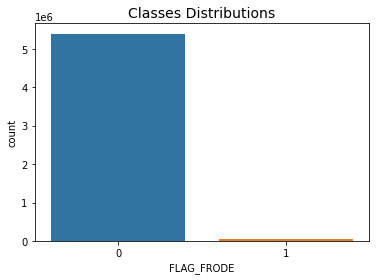

In [17]:
print('Distribution of the Classes in the dataset')
print(df['FLAG_FRODE'].value_counts()/len(df))

sns.countplot('FLAG_FRODE', data=df)
plt.title('Classes Distributions', fontsize=14)
plt.show()

In [18]:
xTrain = df_train[['COD_ESITO', 'PROCESSING_COD', 'IMP_TRZ_RECON',
        'ID_TIPO_CARTA', 'ID_CARTA', 'Row_Num', 'TIME_ORA_OP',
       'DEV_MEDIA_IMP_TC_1M', 'DEV_MEDIA_IMP_TC_3M', 'DEV_MEDIA_IMP_TC_6M',
       'DEV_MEDIA_IMP_TC_9M', 'DEV_MEDIA_IMP_TC_12M',
       'PERC_RISK_CIRC_TC_TO_1M', 'PERC_RISK_CIRC_TC_TO_3M',
       'PERC_RISK_CIRC_TC_TO_6M', 'DEV_MEDIA_IMP_CIRC_TC_TO_1M',
       'DEV_MEDIA_IMP_CIRC_TC_TO_3M', 'DEV_MEDIA_IMP_CIRC_TC_TO_6M',
       'PERC_RISK_PAESE_CAN_IM_1M', 'PERC_RISK_PAESE_CAN_IM_3M',
       'PERC_RISK_PAESE_CAN_IM_6M', 'PERC_RISK_MCC_1M', 'PERC_RISK_MCC_3M',
       'PERC_RISK_MCC_6M', 'PERC_RISK_PAESE_MCC_IM_1M',
       'PERC_RISK_PAESE_MCC_IM_3M', 'PERC_RISK_PAESE_MCC_IM_6M',
       'DEV_MEDIA_IMP_1M', 'DEV_MEDIA_IMP_3M', 'DEV_MEDIA_IMP_6M',
       'DEV_MEDIA_IMP_9M', 'DEV_MEDIA_IMP_12M', 'FLAG_IMP_PREC_0',
       'FLAG_IMP_PREC_0_AUTOR', 'DEV_IMP_MEDIA_ULTIME_3',
       'DEV_IMP_MEDIA_ULTIME_5', 'TREND_3_5', 'DEV_IMP_MEDIO_TRX_PREC',
       'DEV_IMP_MEDIO_TRX_PREC_MESE', 'DEV_IMP_MEDIO_TRX_PREC_GIORNO',
       'DEV_MEDIA_IMP_CAN_1M', 'DEV_MEDIA_IMP_CAN_3M', 'DEV_MEDIA_IMP_CAN_6M',
       'DEV_MEDIA_IMP_CAN_9M', 'DEV_MEDIA_IMP_CAN_12M', 'DEV_MEDIA_IMP_TO_1M',
       'DEV_MEDIA_IMP_TO_3M', 'DEV_MEDIA_IMP_TO_6M', 'DEV_MEDIA_IMP_TO_9M',
       'DEV_MEDIA_IMP_TO_12M', 'PERC_OPER_NON_AUTOR_1M',
       'PERC_OPER_NON_AUTOR_2M', 'PERC_OPER_NON_AUTOR_M',
       'PERC_OPER_NON_AUTOR_G', 'PERC_VAR_NON_AUTOR_G_1M',
       'PERC_VAR_NON_AUTOR_G_2M', 'PERC_VAR_NON_AUTOR_M_1M',
       'PERC_VAR_NON_AUTOR_M_2M', 'FLAG_CAMBIO_INPUT', 'FLAG_CAMBIO_PAESE_AUT',
       'FLAG_CAMBIO_PAESE_NON_AUT', 'FLAG_CAMBIO_PAESE_AUT_IMP_0',
       'FLAG_CAMBIO_PAESE_NON_AUT_IMP_0', 'PERC_ESITO_NSF_G',
       'PERC_ESITO_NSF_M', 'PERC_ESITO_CV2_G', 'PERC_ESITO_CV2_M',
       'PERC_ESITO_PIN_G', 'PERC_ESITO_PIN_M', 'PERC_ESITO_SCUDO_G',
       'PERC_ESITO_SCUDO_M', 'PERC_ESITO_DT_SCAD_G', 'PERC_ESITO_DT_SCAD_M',
       'PERC_ESITO_ALTRO_G', 'PERC_ESITO_ALTRO_M', 'PERC_ESITO_ALL_G',
       'PERC_ESITO_ALL_M', 'DEV_MEDIA_AUT_SEC_4', 'DEV_MEDIA_AUT_TO_SEC_4',
       'MEDIA_NON_AUT_SEC_4', 'MEDIA_NON_AUT_SEC_3', 'MEDIA_NON_AUT_SEC_2',
       'TIME_NON_AUT_SEC_LAST']]

xTest = df_test[['COD_ESITO', 'PROCESSING_COD', 'IMP_TRZ_RECON', 'ID_TIPO_CARTA', 'ID_CARTA', 'Row_Num', 'TIME_ORA_OP',
       'DEV_MEDIA_IMP_TC_1M', 'DEV_MEDIA_IMP_TC_3M', 'DEV_MEDIA_IMP_TC_6M',
       'DEV_MEDIA_IMP_TC_9M', 'DEV_MEDIA_IMP_TC_12M',
       'PERC_RISK_CIRC_TC_TO_1M', 'PERC_RISK_CIRC_TC_TO_3M',
       'PERC_RISK_CIRC_TC_TO_6M', 'DEV_MEDIA_IMP_CIRC_TC_TO_1M',
       'DEV_MEDIA_IMP_CIRC_TC_TO_3M', 'DEV_MEDIA_IMP_CIRC_TC_TO_6M',
       'PERC_RISK_PAESE_CAN_IM_1M', 'PERC_RISK_PAESE_CAN_IM_3M',
       'PERC_RISK_PAESE_CAN_IM_6M', 'PERC_RISK_MCC_1M', 'PERC_RISK_MCC_3M',
       'PERC_RISK_MCC_6M', 'PERC_RISK_PAESE_MCC_IM_1M',
       'PERC_RISK_PAESE_MCC_IM_3M', 'PERC_RISK_PAESE_MCC_IM_6M',
       'DEV_MEDIA_IMP_1M', 'DEV_MEDIA_IMP_3M', 'DEV_MEDIA_IMP_6M',
       'DEV_MEDIA_IMP_9M', 'DEV_MEDIA_IMP_12M', 'FLAG_IMP_PREC_0',
       'FLAG_IMP_PREC_0_AUTOR', 'DEV_IMP_MEDIA_ULTIME_3',
       'DEV_IMP_MEDIA_ULTIME_5', 'TREND_3_5', 'DEV_IMP_MEDIO_TRX_PREC',
       'DEV_IMP_MEDIO_TRX_PREC_MESE', 'DEV_IMP_MEDIO_TRX_PREC_GIORNO',
       'DEV_MEDIA_IMP_CAN_1M', 'DEV_MEDIA_IMP_CAN_3M', 'DEV_MEDIA_IMP_CAN_6M',
       'DEV_MEDIA_IMP_CAN_9M', 'DEV_MEDIA_IMP_CAN_12M', 'DEV_MEDIA_IMP_TO_1M',
       'DEV_MEDIA_IMP_TO_3M', 'DEV_MEDIA_IMP_TO_6M', 'DEV_MEDIA_IMP_TO_9M',
       'DEV_MEDIA_IMP_TO_12M', 'PERC_OPER_NON_AUTOR_1M',
       'PERC_OPER_NON_AUTOR_2M', 'PERC_OPER_NON_AUTOR_M',
       'PERC_OPER_NON_AUTOR_G', 'PERC_VAR_NON_AUTOR_G_1M',
       'PERC_VAR_NON_AUTOR_G_2M', 'PERC_VAR_NON_AUTOR_M_1M',
       'PERC_VAR_NON_AUTOR_M_2M', 'FLAG_CAMBIO_INPUT', 'FLAG_CAMBIO_PAESE_AUT',
       'FLAG_CAMBIO_PAESE_NON_AUT', 'FLAG_CAMBIO_PAESE_AUT_IMP_0',
       'FLAG_CAMBIO_PAESE_NON_AUT_IMP_0', 'PERC_ESITO_NSF_G',
       'PERC_ESITO_NSF_M', 'PERC_ESITO_CV2_G', 'PERC_ESITO_CV2_M',
       'PERC_ESITO_PIN_G', 'PERC_ESITO_PIN_M', 'PERC_ESITO_SCUDO_G',
       'PERC_ESITO_SCUDO_M', 'PERC_ESITO_DT_SCAD_G', 'PERC_ESITO_DT_SCAD_M',
       'PERC_ESITO_ALTRO_G', 'PERC_ESITO_ALTRO_M', 'PERC_ESITO_ALL_G',
       'PERC_ESITO_ALL_M', 'DEV_MEDIA_AUT_SEC_4', 'DEV_MEDIA_AUT_TO_SEC_4',
       'MEDIA_NON_AUT_SEC_4', 'MEDIA_NON_AUT_SEC_3', 'MEDIA_NON_AUT_SEC_2',
       'TIME_NON_AUT_SEC_LAST']]

yTrain = df_train["FLAG_FRODE"]

yTest = df_test["FLAG_FRODE"]

In [19]:
counter = Counter(yTrain)
counter

Counter({0: 4466614, 1: 38613})

A best practice for using the class weighting is to use the inverse of the class distribution
present in the training dataset.

In [20]:
from sklearn.linear_model import LogisticRegression
weights = {0: 38613, 1: 4466614}
#logistic regression model creation 
lr = LogisticRegression(class_weight = weights)
lr.fit(xTrain,yTrain)
predictions_lr = lr.predict(xTest)

In [21]:
lr.fit(xTrain,yTrain)
predictions_lr = lr.predict(xTest)
print(confusion_matrix(yTest, predictions_lr))

[[275453 429897]
 [  1295   5061]]


In [22]:
import numpy as np
cm_lr = confusion_matrix(yTest, predictions_lr)

tn = cm_lr[0][0]
fp = cm_lr[0][1]
fn = cm_lr[1][0]
tp = cm_lr[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
recall = recall_score(yTest, predictions_lr) 
print("The Recall is {}".format(recall)) 

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
f1score = f1_score(yTest, predictions_lr) 
print("The F1 Score is {}".format(f1score)) 

#Precision
print("Precision: " ,tp/(tp+fp) )
precision = precision_score(yTest, predictions_lr) 
print("The precision Score is {}".format(precision)) 


roc_auc = roc_auc_score(yTest, predictions_lr) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions_lr) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

Accuracy 0.39414308717363633
The Recall is 0.7962555066079295
Specificity 0.39051960019848303
The F1 Score is 0.0229360500686586
Precision:  0.011635606196460348
The precision Score is 0.011635606196460348
The ROC AUC Score is 0.5933875534032063
The Average precision Score is 0.011084487071315836
G-Mean 0.5576319414240626


In [47]:
import numpy as np
cm_lr = confusion_matrix(yTest, predictions_lr)

tn = cm_lr[0][0]
fp = cm_lr[0][1]
fn = cm_lr[1][0]
tp = cm_lr[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

roc_auc = roc_auc_score(yTest, predictions_lr) 
print("The ROC AUC Score is {}".format(roc_auc)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

The ROC AUC Score is 0.5933875534032063
G-Mean 0.5576319414240626


In [27]:

# predict probabilities
lr_probs = lr.predict_proba(xTest)
lr_probs

preds = lr_probs[:,1]
precision, recall, threshold = precision_recall_curve(yTest, preds)
auc_score = auc(recall, precision)
print('lr PR AUC: %.3f' % auc_score)

lr PR AUC: 0.012


In [28]:
scale_pos = 4466614/38613
scale_pos

115.67643021780229

In [29]:
#For XGB
# Make predictions on validation dataset
XGB = XGBClassifier(random_state=0,n_jobs=-1, eval_metric = 'logloss',
                    use_label_encoder =False, scale_pos_weight = 115.67643021780229)

In [30]:
XGB.get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity', 'eval_metric'])

In [31]:
XGB.fit(xTrain,yTrain)
predictions_xgb = XGB.predict(xTest)
print(accuracy_score(yTest, predictions_xgb))
print(confusion_matrix(yTest, predictions_xgb))
print(classification_report(yTest, predictions_xgb))

0.9131565562184385
[[645235  60115]
 [  1692   4664]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    705350
           1       0.07      0.73      0.13      6356

    accuracy                           0.91    711706
   macro avg       0.53      0.82      0.54    711706
weighted avg       0.99      0.91      0.95    711706



In [52]:
xgb_probs = XGB.predict_proba(xTest)
predict_xgb = (xgb_probs[:,1] > 0.4).astype(int)
print(confusion_matrix(yTest, predict_xgb))

[[632252  73098]
 [  1428   4928]]


In [48]:
import numpy as np
cm_xgb = confusion_matrix(yTest, predictions_xgb)

tn = cm_xgb[0][0]
fp = cm_xgb[0][1]
fn = cm_xgb[1][0]
tp = cm_xgb[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
recall = recall_score(yTest, predictions_xgb) 
print("The Recall is {}".format(recall)) 

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
f1score = f1_score(yTest, predictions_xgb) 
print("The F1 Score is {}".format(f1score)) 

#Precision
print("Precision: " ,tp/(tp+fp) )
precision = precision_score(yTest, predictions_xgb) 
print("The precision Score is {}".format(precision)) 


roc_auc = roc_auc_score(yTest, predictions_xgb) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions_xgb) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))


Accuracy 0.9131565562184385
The Recall is 0.7337948395217118
Specificity 0.914772807825902
The F1 Score is 0.13113094819709004
Precision:  0.07199864153506538
The precision Score is 0.07199864153506538
The ROC AUC Score is 0.8242838236738069
The Average precision Score is 0.055209617778888484
G-Mean 0.8193018770376602


In [33]:
from sklearn.metrics import precision_recall_curve
# predict probabilities
xgb_probs = XGB.predict_proba(xTest)
xgb_probs

array([[1.1184335e-02, 9.8881567e-01],
       [9.8288113e-01, 1.7118879e-02],
       [9.4767618e-01, 5.2323807e-02],
       ...,
       [9.9996263e-01, 3.7367117e-05],
       [9.9994612e-01, 5.3895881e-05],
       [9.9993992e-01, 6.0079496e-05]], dtype=float32)

In [34]:
preds = xgb_probs[:,1]
precision, recall, threshold = precision_recall_curve(yTest, preds)
auc_score = auc(recall, precision)
print("The PR AUC is {}".format(auc_score))

The PR AUC is 0.23011697451906424


In [36]:
#building the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 

#random forest model creation 
rfc = RandomForestClassifier(random_state=0, class_weight='balanced')
rfc.fit(xTrain,yTrain)
predictions = rfc.predict(xTest)


[[705307     43]
 [  6027    329]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    705350
           1       0.88      0.05      0.10      6356

    accuracy                           0.99    711706
   macro avg       0.94      0.53      0.55    711706
weighted avg       0.99      0.99      0.99    711706



In [ ]:
print(confusion_matrix(yTest, predictions))
print(classification_report(yTest, predictions))

In [37]:
import numpy as np
cm = confusion_matrix(yTest, predictions)

tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
recall = recall_score(yTest, predictions, average='weighted') 
print("The Recall is {}".format(recall)) 

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
f1score = f1_score(yTest, predictions, average='weighted') 
print("The F1 Score is {}".format(f1score)) 

#Precision
print("Precision: " ,tp/(tp+fp) )

roc_auc = roc_auc_score(yTest, predictions) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

Accuracy 0.9914711973764447
The Recall is 0.9914711973764447
Specificity 0.9999390373573404
The F1 Score is 0.9876963774292775
Precision:  0.8844086021505376
The ROC AUC Score is 0.5258505759473927
The Average precision Score is 0.05424724377957872
G-Mean 0.9956961156257123


In [38]:
# predict probabilities
rfc_probs = rfc.predict_proba(xTest)
preds = rfc_probs[:,1]
precision, recall, threshold = precision_recall_curve(yTest, preds)
auc_score = auc(recall, precision)
print("The PR AUC is {}".format(auc_score))

The PR AUC is 0.19257847510201248


In [46]:
#building the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
#random forest model creation 
rfc = RandomForestClassifier(random_state=0, class_weight='balanced_subsample')
rfc.fit(xTrain,yTrain)
predictions = rfc.predict(xTest)
print(confusion_matrix(yTest, predictions))
print(classification_report(yTest, predictions))

[[705307     43]
 [  6016    340]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    705350
           1       0.89      0.05      0.10      6356

    accuracy                           0.99    711706
   macro avg       0.94      0.53      0.55    711706
weighted avg       0.99      0.99      0.99    711706



In [ ]:
import numpy as np
cm = confusion_matrix(yTest, predictions)

tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
recall = recall_score(yTest, predictions, average='weighted') 
print("The Recall is {}".format(recall)) 

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
f1score = f1_score(yTest, predictions, average='weighted') 
print("The F1 Score is {}".format(f1score)) 

#Precision
print("Precision: " ,tp/(tp+fp) )

roc_auc = roc_auc_score(yTest, predictions) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

In [40]:
#For easy ensemble
# Make predictions on validation dataset
easy = EasyEnsembleClassifier(random_state=0)
easy.fit(xTrain,yTrain)
predictions_easy = easy.predict(xTest)


0.7864609824843405
[[553922 151428]
 [   549   5807]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88    705350
           1       0.04      0.91      0.07      6356

    accuracy                           0.79    711706
   macro avg       0.52      0.85      0.48    711706
weighted avg       0.99      0.79      0.87    711706



In [ ]:
print(accuracy_score(yTest, predictions_easy))
print(confusion_matrix(yTest, predictions_easy))
print(classification_report(yTest, predictions_easy))

In [41]:
# predict probabilities
easy_probs = easy.predict_proba(xTest)
easy_probs

array([[0.49103143, 0.50896857],
       [0.51508032, 0.48491968],
       [0.51239518, 0.48760482],
       ...,
       [0.51209091, 0.48790909],
       [0.51567936, 0.48432064],
       [0.51653411, 0.48346589]])

In [42]:
easypreds = easy_probs[:,1]
precision, recall, threshold = precision_recall_curve(yTest, easypreds)
auc_score = auc(recall, precision)
print("The PR AUC is {}".format(auc_score))

The PR AUC is 0.1684857667079708


In [43]:
cm = confusion_matrix(yTest, predictions_easy)

tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
recall = recall_score(yTest, predictions_easy, average='weighted') 
print("The Recall is {}".format(recall)) 

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
f1score = f1_score(yTest, predictions_easy, average='weighted') 
print("The F1 Score is {}".format(f1score)) 

#Precision
print("Precision: " ,tp/(tp+fp) )

roc_auc = roc_auc_score(yTest, predictions_easy) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions_easy) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

Accuracy 0.7864609824843405
The Recall is 0.7864609824843405
Specificity 0.785315091798398
The F1 Score is 0.8721469044532568
Precision:  0.036931980793080424
The ROC AUC Score is 0.8494700065662852
The Average precision Score is 0.03451336398424497
G-Mean 0.785887828290748


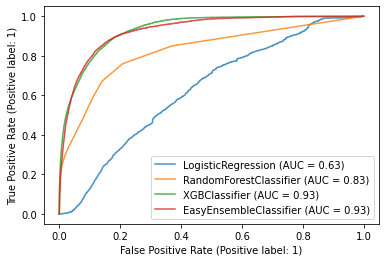

In [44]:
from sklearn.metrics import plot_roc_curve
ax = plt.gca()

LR_disp = plot_roc_curve(lr, xTest, yTest, ax=ax, alpha=0.8)
rfc_disp = plot_roc_curve(rfc, xTest, yTest, ax=ax, alpha=0.8)
xgb_disp = plot_roc_curve(XGB, xTest, yTest, ax=ax, alpha=0.8)
ada_disp = plot_roc_curve(easy, xTest, yTest, ax=ax, alpha=0.8)


plt.show()